<a href="https://colab.research.google.com/github/wakhungu-daisy/Paris-house-pricing/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Paris House Prediction

In [ ]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [96]:
import pandas as pd

df = pd.read_csv('/archive.zip')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.shape)

(10000, 17)


In [ ]:
df

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005           0                  1   
1                 8              6  2015           1                  0   
2                 6              8  2021           0                  0   
3                10              4  2012           0                  1   
4                 3              7  1990           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         4313   9005     956               0             7  7559081.5  
1         3653   2436     128               1             2  8085989.5  
2         2937   8852     135               1             9  5574642.1  
3          659   7141     359               0             3  3232561.2  
4         8435   2429     292               1             4  7055052.0  
...        ...    ...     ...             ...           ...        ...  
9995      9311   1698     218               0             4   176425.9  
9996      9061   1742     230               0             0  4448474.0  
9997      8304   7730     345               1             9  8390030.5  
9998      2590   6174     339               1             4  5905107.0  
9999      8485   2024     278               1             6   146708.4  

[10000 rows x 17 columns]

In [ ]:
df.head()


squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
df.describe()


squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

In [ ]:
# Check for missing values in the data
print(df.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)


In [ ]:
# Impute missing values with the mean value of the column
df.fillna(df.mean(), inplace=True)


In [ ]:
df.isna().sum()


squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.drop(['squareMeters', 'numberOfRooms'], axis=1, inplace=True)


In [ ]:
#checking for correlations and an overview information of the data
df.corr().T

squareMeters  numberOfRooms   hasYard   hasPool    floors  \
squareMeters           1.000000       0.009573 -0.006650 -0.005594  0.001109   
numberOfRooms          0.009573       1.000000 -0.011240  0.017015  0.022244   
hasYard               -0.006650      -0.011240  1.000000  0.015514 -0.000883   
hasPool               -0.005594       0.017015  0.015514  1.000000 -0.004006   
floors                 0.001109       0.022244 -0.000883 -0.004006  1.000000   
cityCode              -0.001541       0.009040  0.006760  0.008072  0.002207   
cityPartRange          0.008758       0.008340  0.005023  0.014613 -0.004921   
numPrevOwners          0.016619       0.016766  0.004279 -0.006848  0.002463   
made                  -0.007207       0.003978  0.002214  0.001894  0.005022   
isNewBuilt            -0.010667      -0.002865 -0.008370  0.000188  0.002458   
hasStormProtector      0.007480      -0.001656 -0.007598 -0.001001 -0.008566   
basement              -0.003960      -0.013990 -0.008558 -0.007268  0.006228   
attic                 -0.000588       0.012061 -0.003085 -0.011901 -0.000270   
garage                -0.017246       0.023188 -0.004626  0.004832  0.011303   
hasStorageRoom        -0.003486      -0.004760 -0.009506  0.001238  0.003616   
hasGuestRoom          -0.000623      -0.015529 -0.007276  0.001123 -0.021155   
price                  0.999999       0.009591 -0.006119 -0.005070  0.001654   

                   cityCode  cityPartRange  numPrevOwners      made  \
squareMeters      -0.001541       0.008758       0.016619 -0.007207   
numberOfRooms      0.009040       0.008340       0.016766  0.003978   
hasYard            0.006760       0.005023       0.004279  0.002214   
hasPool            0.008072       0.014613      -0.006848  0.001894   
floors             0.002207      -0.004921       0.002463  0.005022   
cityCode           1.000000       0.011334      -0.007549  0.009266   
cityPartRange      0.011334       1.000000       0.009238  0.007748   
numPrevOwners     -0.007549       0.009238       1.000000  0.006858   
made               0.009266       0.007748       0.006858  1.000000   
isNewBuilt        -0.000224      -0.001874      -0.017420 -0.001678   
hasStormProtector -0.004941       0.005224       0.002522 -0.000645   
basement           0.002652       0.004743      -0.000862 -0.005506   
attic             -0.002019       0.010696       0.000719  0.013773   
garage            -0.002208      -0.001648       0.020268  0.005687   
hasStorageRoom     0.002554      -0.011338       0.031707 -0.007868   
hasGuestRoom      -0.003338      -0.007153      -0.006082 -0.005431   
price             -0.001539       0.008813       0.016619 -0.007210   

                   isNewBuilt  hasStormProtector  basement     attic  \
squareMeters        -0.010667           0.007480 -0.003960 -0.000588   
numberOfRooms       -0.002865          -0.001656 -0.013990  0.012061   
hasYard             -0.008370          -0.007598 -0.008558 -0.003085   
hasPool              0.000188          -0.001001 -0.007268 -0.011901   
floors               0.002458          -0.008566  0.006228 -0.000270   
cityCode            -0.000224          -0.004941  0.002652 -0.002019   
cityPartRange       -0.001874           0.005224  0.004743  0.010696   
numPrevOwners       -0.017420           0.002522 -0.000862  0.000719   
made                -0.001678          -0.000645 -0.005506  0.013773   
isNewBuilt           1.000000           0.003200 -0.015986  0.020127   
hasStormProtector    0.003200           1.000000 -0.005001 -0.003753   
basement            -0.015986          -0.005001  1.000000 -0.003180   
attic                0.020127          -0.003753 -0.003180  1.000000   
garage               0.002749           0.003758  0.000117 -0.000611   
hasStorageRoom       0.007011           0.001401 -0.010815 -0.000789   
hasGuestRoom         0.019895          -0.006549 -0.020732 -0.011995   
price               -0.010643           0.007496 -0.003967 -0.000600   

  

In [ ]:
#correlation of the dependent variable 
df.corr()['squareMeters']

squareMeters         1.000000
numberOfRooms        0.009573
hasYard             -0.006650
hasPool             -0.005594
floors               0.001109
cityCode            -0.001541
cityPartRange        0.008758
numPrevOwners        0.016619
made                -0.007207
isNewBuilt          -0.010667
hasStormProtector    0.007480
basement            -0.003960
attic               -0.000588
garage              -0.017246
hasStorageRoom      -0.003486
hasGuestRoom        -0.000623
price                0.999999
Name: squareMeters, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import numpy as np

# Create a numpy array
X = np.array([[1, 2, 3,4,5,6,7,8,9], [10,11,12,13,14,15,16,17]])

# Check the shape of the numpy array
print(X.shape)


(2,)


<ipython-input-20-d1ad988cbfdc>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[1, 2, 3,4,5,6,7,8,9], [10,11,12,13,14,15,16,17]])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# spliting of data training the machine learning model 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=False)

In [ ]:
X_train.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
7389         21229             44        1        0      82     23820   
9275         21364             73        1        1      42     64233   
2995         92877             22        1        1      57      7054   
5316         57132             74        1        0      70     23266   
356          25269             88        0        0      92     86720   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
7389              9              6  2020           0                  1   
9275              9              1  1996           1                  1   
2995              8              3  1993           0                  0   
5316              8              8  2014           0                  1   
356               6              7  2019           1                  1   

      basement  attic  garage  hasStorageRoom  hasGuestRoom  
7389      5610   4059     419               1             9  
9275       370   6597     157               0             3  
2995      5428   5905     170               1             8  
5316       671   6361     832               1            10  
356       3464   5175     693               1             1

In [ ]:
y_train.head()

7389    2132694.0
9275    2145401.6
2995    9293826.3
5316    5724484.4
356     2530193.9
Name: price, dtype: float64

In [ ]:
#joining of the data set for training and visualization
data1=X_train.join(y_train)
data1.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
7389         21229             44        1        0      82     23820   
9275         21364             73        1        1      42     64233   
2995         92877             22        1        1      57      7054   
5316         57132             74        1        0      70     23266   
356          25269             88        0        0      92     86720   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
7389              9              6  2020           0                  1   
9275              9              1  1996           1                  1   
2995              8              3  1993           0                  0   
5316              8              8  2014           0                  1   
356               6              7  2019           1                  1   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
7389      5610   4059     419               1             9  2132694.0  
9275       370   6597     157               0             3  2145401.6  
2995      5428   5905     170               1             8  9293826.3  
5316       671   6361     832               1            10  5724484.4  
356       3464   5175     693               1             1  2530193.9

In [ ]:
#checking for correlations 
data1.corr()

squareMeters  numberOfRooms   hasYard   hasPool    floors  \
squareMeters           1.000000       0.004375 -0.001630  0.000539 -0.001416   
numberOfRooms          0.004375       1.000000 -0.014496  0.016042  0.022404   
hasYard               -0.001630      -0.014496  1.000000  0.018275 -0.006298   
hasPool                0.000539       0.016042  0.018275  1.000000 -0.009252   
floors                -0.001416       0.022404 -0.006298 -0.009252  1.000000   
cityCode              -0.004704       0.010120  0.008909  0.002678  0.010107   
cityPartRange          0.015370       0.004425  0.006932  0.013775 -0.008909   
numPrevOwners          0.012999       0.023163  0.002454 -0.012978 -0.003576   
made                  -0.010085       0.001601  0.006716  0.009518  0.002584   
isNewBuilt            -0.013599       0.001453 -0.004106  0.011470  0.000987   
hasStormProtector      0.006860      -0.005292 -0.004016  0.003753 -0.006618   
basement              -0.007770      -0.009050 -0.002080 -0.007420  0.007039   
attic                  0.001467       0.009884  0.001556 -0.008635 -0.003052   
garage                -0.027210       0.028055 -0.001425  0.008401  0.007862   
hasStorageRoom        -0.004176      -0.006600 -0.006890 -0.002970  0.004367   
hasGuestRoom           0.007854      -0.016887 -0.014362  0.006110 -0.023487   
price                  0.999999       0.004388 -0.001102  0.001062 -0.000881   

                   cityCode  cityPartRange  numPrevOwners      made  \
squareMeters      -0.004704       0.015370       0.012999 -0.010085   
numberOfRooms      0.010120       0.004425       0.023163  0.001601   
hasYard            0.008909       0.006932       0.002454  0.006716   
hasPool            0.002678       0.013775      -0.012978  0.009518   
floors             0.010107      -0.008909      -0.003576  0.002584   
cityCode           1.000000       0.013633      -0.005641  0.016511   
cityPartRange      0.013633       1.000000       0.005881  0.000246   
numPrevOwners     -0.005641       0.005881       1.000000  0.012474   
made               0.016511       0.000246       0.012474  1.000000   
isNewBuilt         0.001156       0.000189      -0.009417 -0.005395   
hasStormProtector -0.009126       0.007695       0.000915  0.009249   
basement          -0.000748       0.013678      -0.008494  0.007261   
attic             -0.004284       0.007751       0.004407  0.013613   
garage             0.005164      -0.005998       0.022226  0.013691   
hasStorageRoom     0.002210      -0.016819       0.041191 -0.004998   
hasGuestRoom      -0.009067      -0.005484      -0.003350 -0.005387   
price             -0.004701       0.015429       0.012989 -0.010079   

                   isNewBuilt  hasStormProtector  basement     attic  \
squareMeters        -0.013599           0.006860 -0.007770  0.001467   
numberOfRooms        0.001453          -0.005292 -0.009050  0.009884   
hasYard             -0.004106          -0.004016 -0.002080  0.001556   
hasPool              0.011470           0.003753 -0.007420 -0.008635   
floors               0.000987          -0.006618  0.007039 -0.003052   
cityCode             0.001156          -0.009126 -0.000748 -0.004284   
cityPartRange        0.000189           0.007695  0.013678  0.007751   
numPrevOwners       -0.009417           0.000915 -0.008494  0.004407   
made                -0.005395           0.009249  0.007261  0.013613   
isNewBuilt           1.000000           0.000771 -0.019458  0.019269   
hasStormProtector    0.000771           1.000000  0.001181 -0.005009   
basement            -0.019458           0.001181  1.000000  0.002567   
attic                0.019269          -0.005009  0.002567  1.000000   
garage              -0.007873           0.001024  0.001363 -0.010478   
hasStorageRoom      -0.002318          -0.000770 -0.019651  0.003252   
hasGuestRoom         0.026753          -0.002344 -0.016408 -0.010004   
price               -0.013575           0.006880 -0.007771  0.001455   

  

In [ ]:
X_test

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
9394         13984              6        0        1      54     95904   
898           5017             48        0        0      49     71704   
2398         62686             39        0        1      71     16804   
5906         87589             54        0        1      80     48335   
2343          1863             16        1        1      22     59808   
...            ...            ...      ...      ...     ...       ...   
1037         81065             95        0        1      80     31317   
2899         29710             96        1        0      67     33509   
9549         61839             66        1        1       9     13131   
2740         88616             92        0        1      37     76142   
6690         95012             50        1        0      57     72198   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
9394              9             10  2002           0                  0   
898               1              5  1993           1                  0   
2398              1              2  1994           1                  1   
5906              6              2  2016           1                  1   
2343              7              5  2010           1                  0   
...             ...            ...   ...         ...                ...   
1037              8              4  2020           0                  1   
2899              7              8  2015           0                  1   
9549              1              9  2009           0                  0   
2740              3              1  1999           1                  1   
6690              6              1  2009           1                  1   

      basement  attic  garage  hasStorageRoom  hasGuestRoom  
9394       308   9837     660               0             1  
898       9420   7264     343               0             5  
2398      4240   1161     759               1             8  
5906      1104   4887     531               0             0  
2343      2578   4996     490               0             0  
...        ...    ...     ...             ...           ...  
1037      4196   3559     161               0             1  
2899      9951   4716    1000               1             2  
9549      1392   5346     555               1             2  
2740      8685   9638     382               1             0  
6690      1933   4452     558               0             6  

[2000 rows x 16 columns]

In [ ]:
X_train

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
7389         21229             44        1        0      82     23820   
9275         21364             73        1        1      42     64233   
2995         92877             22        1        1      57      7054   
5316         57132             74        1        0      70     23266   
356          25269             88        0        0      92     86720   
...            ...            ...      ...      ...     ...       ...   
9225         44750             96        0        0      94     78156   
4859         98157             91        0        1      75     22411   
3264         89172             65        0        0      84     66937   
9845         95011             87        0        0      44     18551   
2732         17655             55        0        0      58     50837   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
7389              9              6  2020           0                  1   
9275              9              1  1996           1                  1   
2995              8              3  1993           0                  0   
5316              8              8  2014           0                  1   
356               6              7  2019           1                  1   
...             ...            ...   ...         ...                ...   
9225             10              5  2018           0                  1   
4859              7              1  2021           1                  1   
3264              9              9  2016           1                  0   
9845              5              4  2015           1                  0   
2732              8              1  2012           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom  
7389      5610   4059     419               1             9  
9275       370   6597     157               0             3  
2995      5428   5905     170               1             8  
5316       671   6361     832               1            10  
356       3464   5175     693               1             1  
...        ...    ...     ...             ...           ...  
9225      8957   1252     108               1             3  
4859      5340   7157     465               0             0  
3264      2187   3283     769               0             4  
9845      9565   6321     477               1             5  
2732      4895   8842     297               0             7  

[8000 rows x 16 columns]

In [ ]:
#Visualizations

<Axes: >

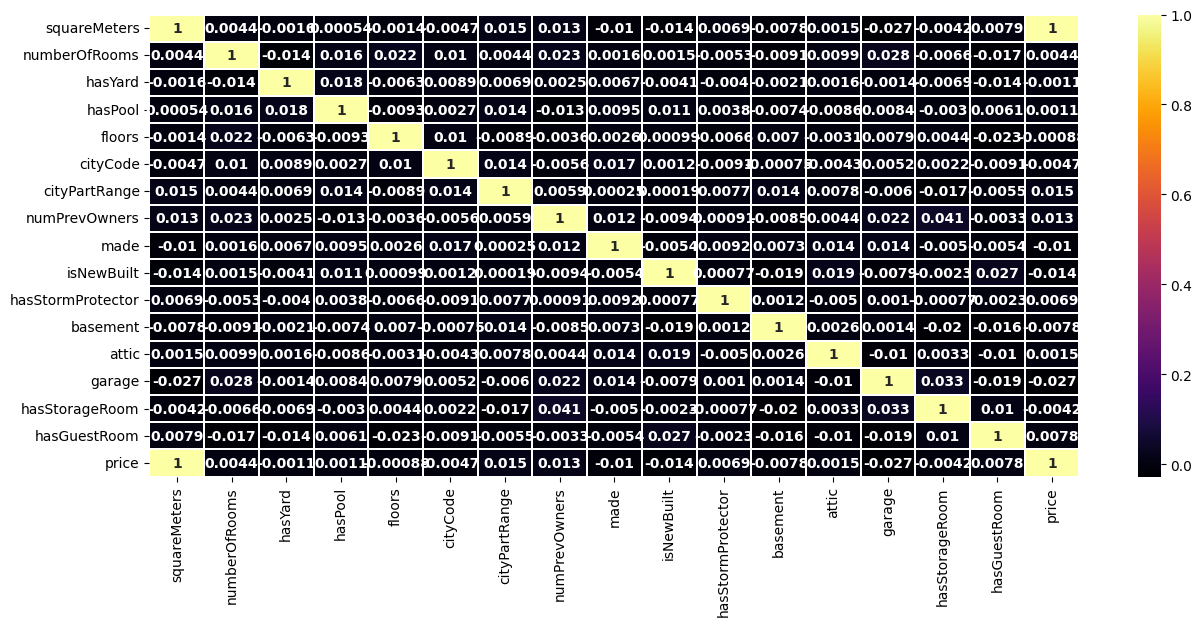

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.heatmap(data1.corr(),annot=True,cmap='inferno',linewidths=0.05,annot_kws={'fontsize':10,'fontweight':'bold'})

<ipython-input-51-613608922940>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['squareMeters'],color='blue')


<Axes: xlabel='squareMeters', ylabel='Density'>

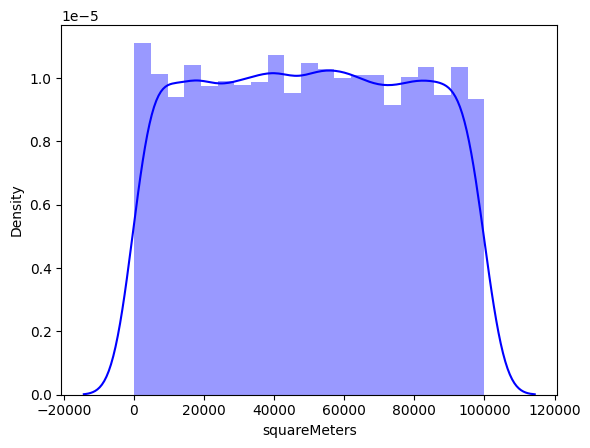

In [ ]:
sns.distplot(data1['squareMeters'],color='blue')

array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'numberOfRooms'}>,
        <Axes: title={'center': 'hasYard'}>,
        <Axes: title={'center': 'hasPool'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'cityCode'}>,
        <Axes: title={'center': 'cityPartRange'}>,
        <Axes: title={'center': 'numPrevOwners'}>],
       [<Axes: title={'center': 'made'}>,
        <Axes: title={'center': 'isNewBuilt'}>,
        <Axes: title={'center': 'hasStormProtector'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'attic'}>,
        <Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'hasStorageRoom'}>,
        <Axes: title={'center': 'hasGuestRoom'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

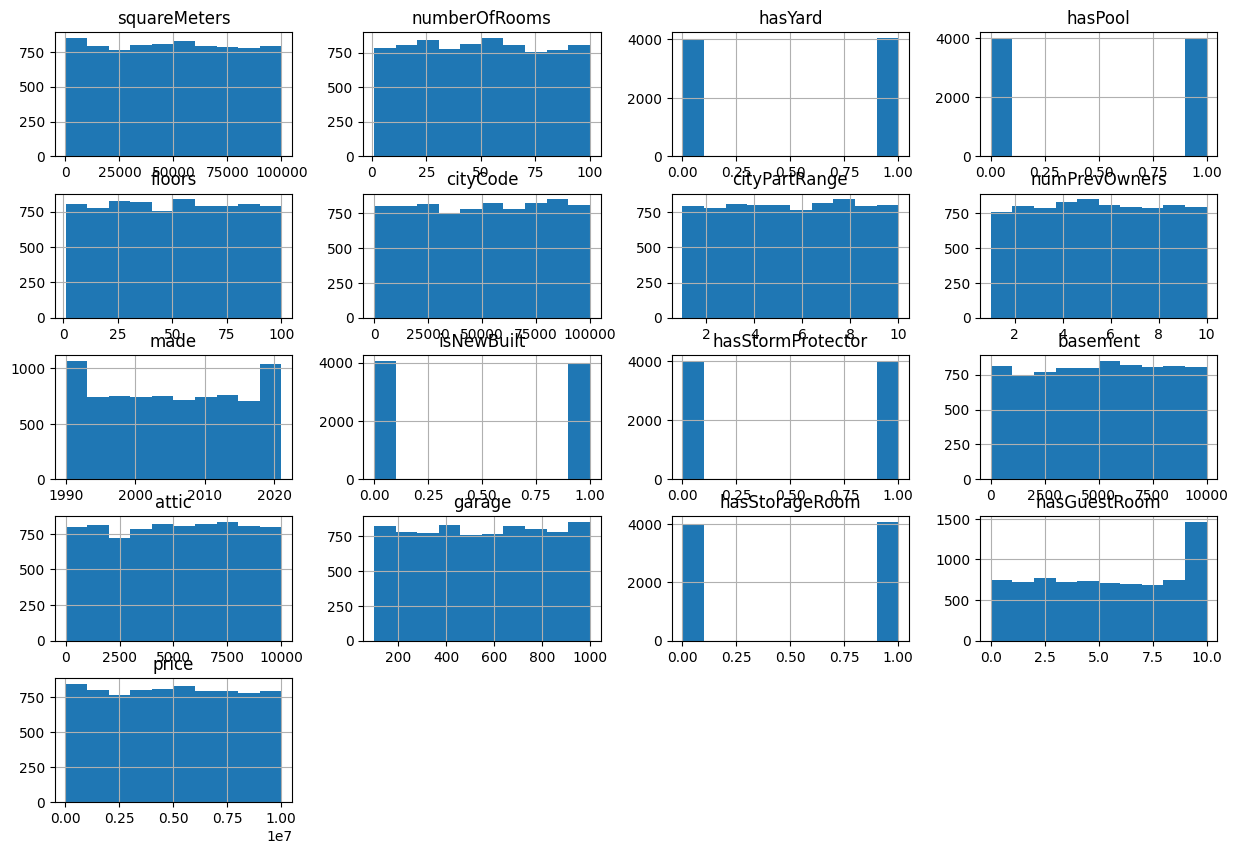

In [ ]:
#visualising the skewness of the data 
data1.hist(figsize=(15,10))

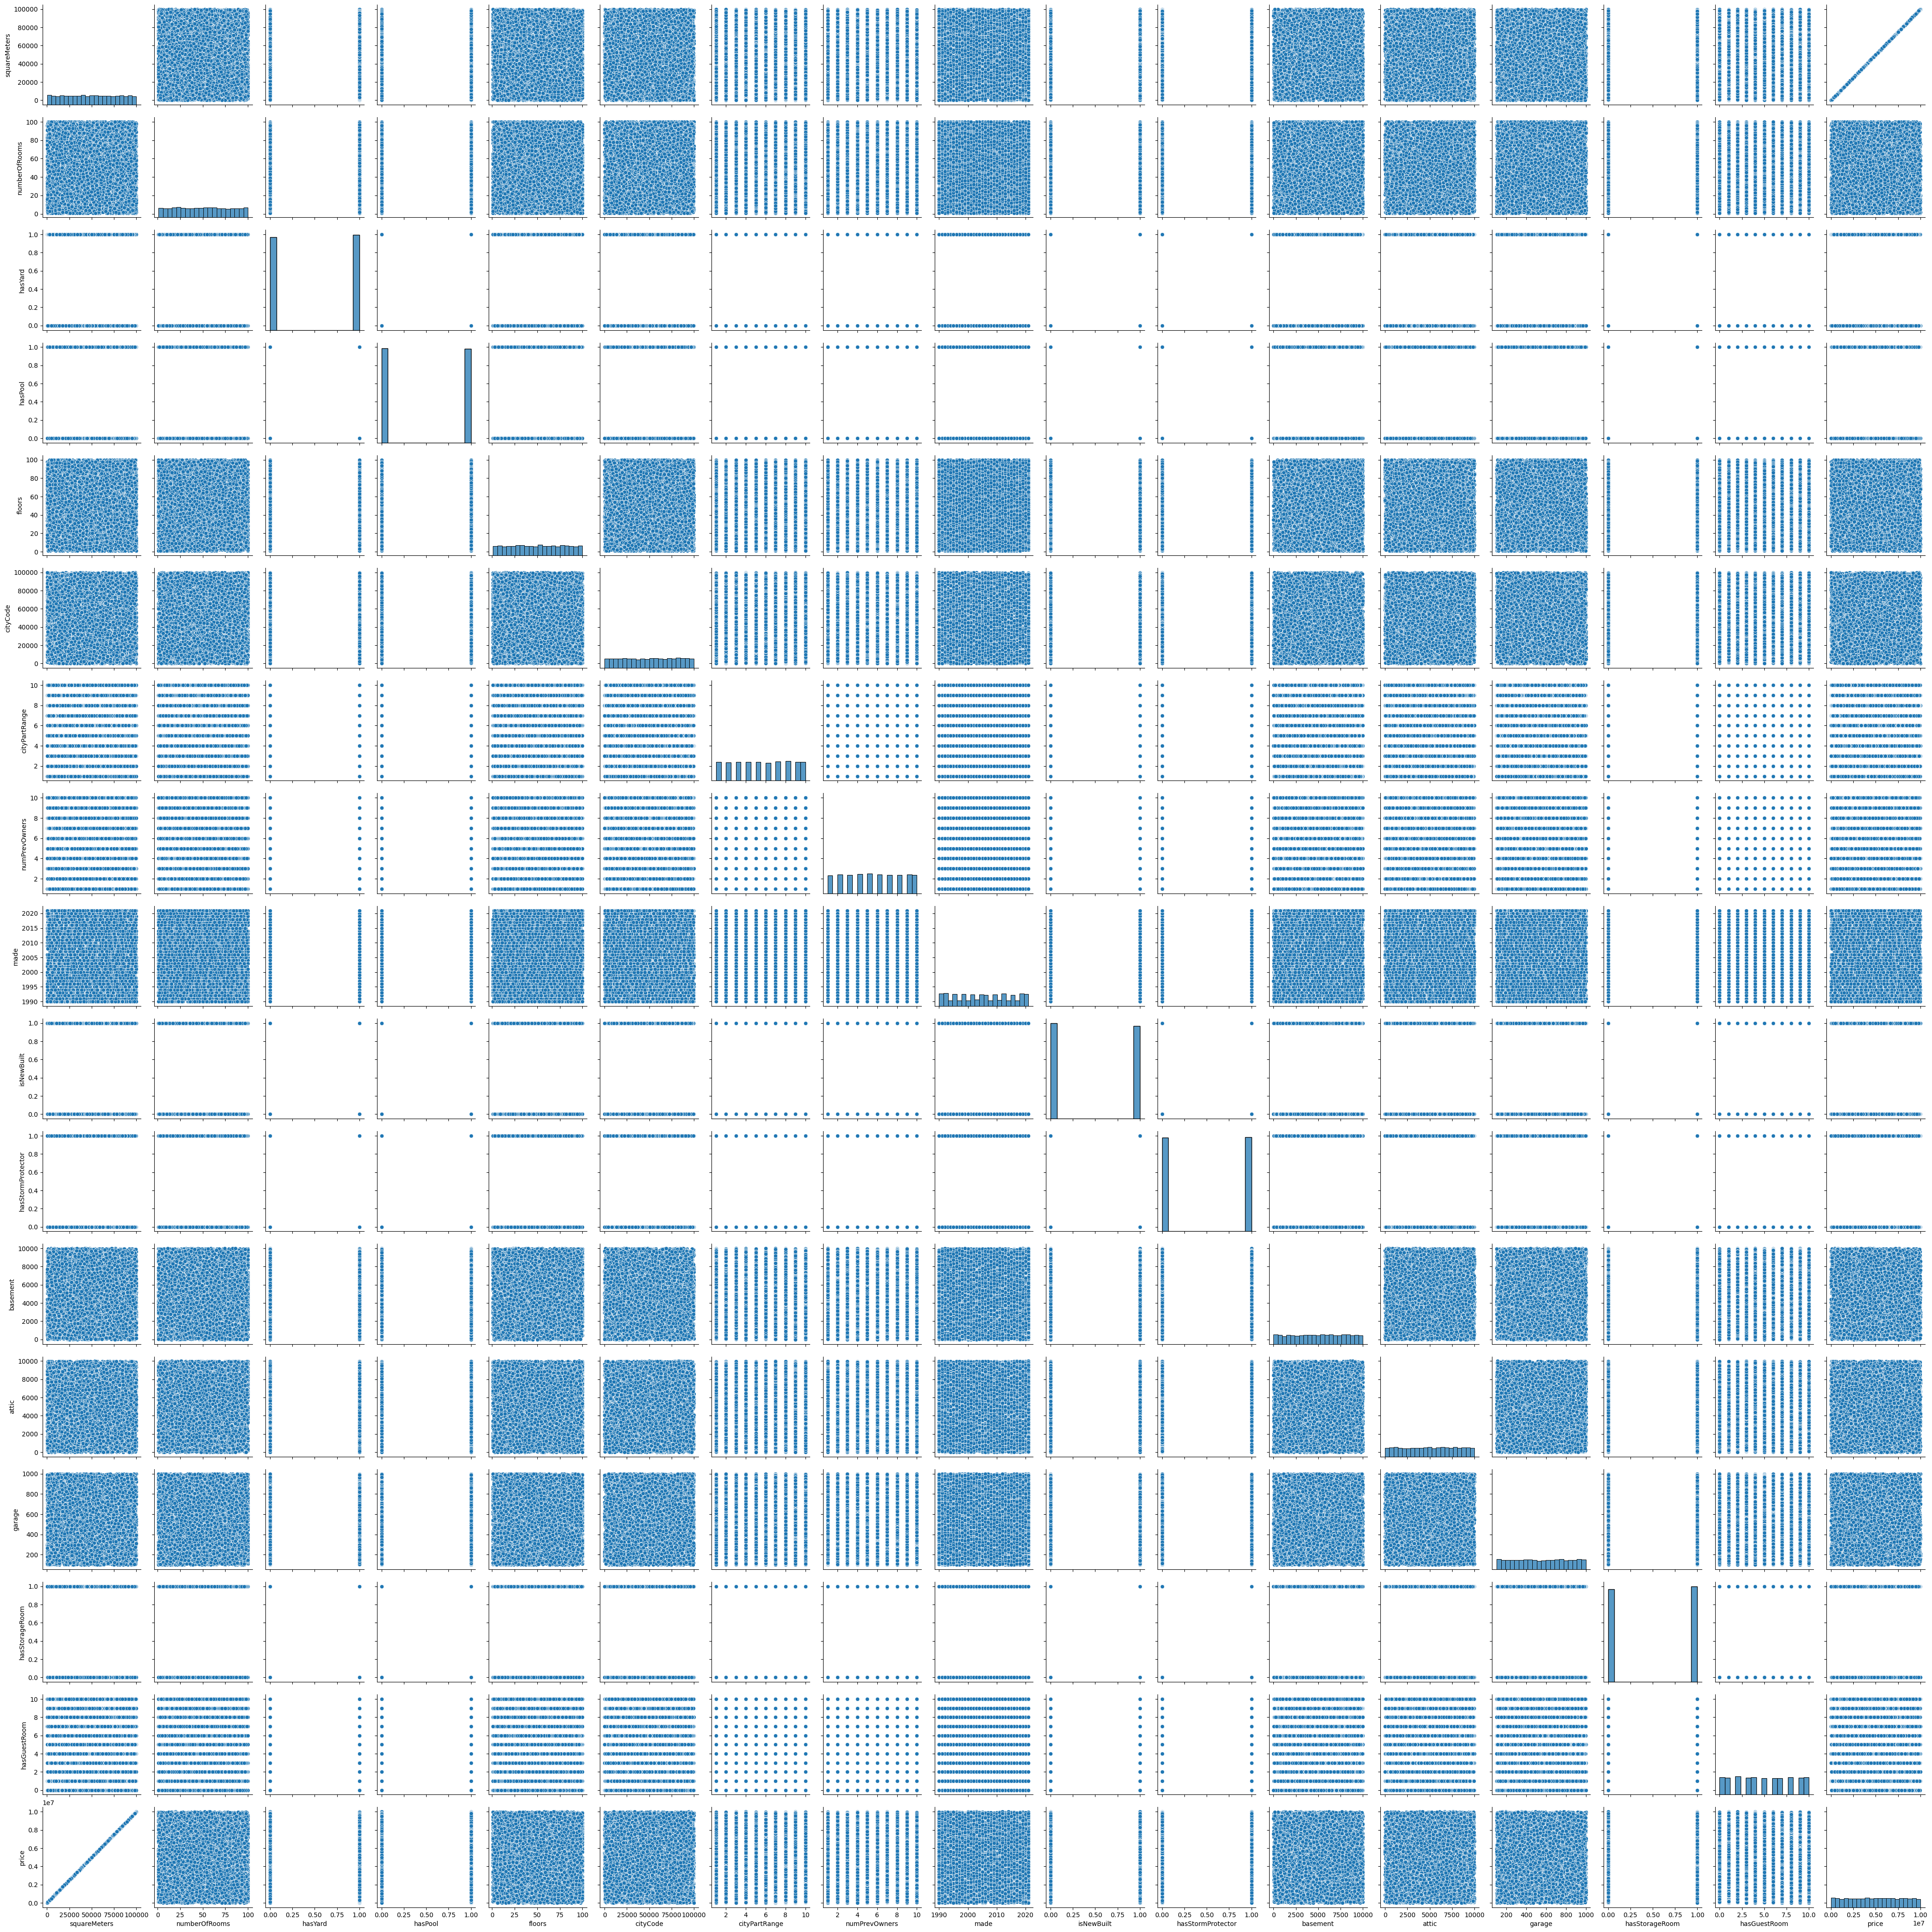

In [ ]:
#Scatter plot
sns.pairplot(data1)

<Axes: xlabel='numberOfRooms', ylabel='price'>

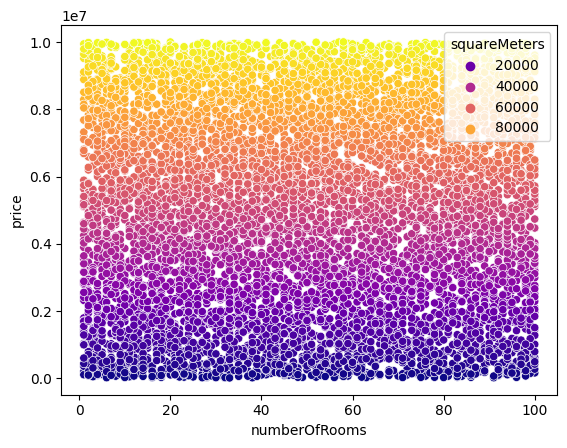

In [ ]:
sns.scatterplot(x='numberOfRooms',y='price',data=data1,hue='squareMeters',palette='plasma')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Regression')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))


Linear Regression
MSE: 3482280.9331280626
R-squared: 0.999999566785081
Random Forest Regression
MSE: 15756626.961831996
R-squared: 0.9999980397888613


In [ ]:
#doing predictiions
predict=rf.predict(X_test)

In [ ]:
predict

array([1406212.02 ,  507293.723, 6276895.523, ..., 6191874.961,
       8864198.344, 9506385.356])

In [ ]:
rf.score(X_train,y_train)

0.9999997482714719

In [ ]:
rf.score(X_test,y_test)

0.9999980397888613

In [ ]:
pred=rf.predict([[67.4567,8.3252,41,880,129,322,126,1245,231,37.8,-122.23,9263.04077285038,556529.1583418,735501.80698384,67432.5170008434,21250.2137667799]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
pred

array([16489.927])

In [ ]:
predict_1=rf.predict([[555,50,230,71,41,8888,129,589,2323,233,-123,3456,5678,123,674,7000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
predict_1

array([67072.85])

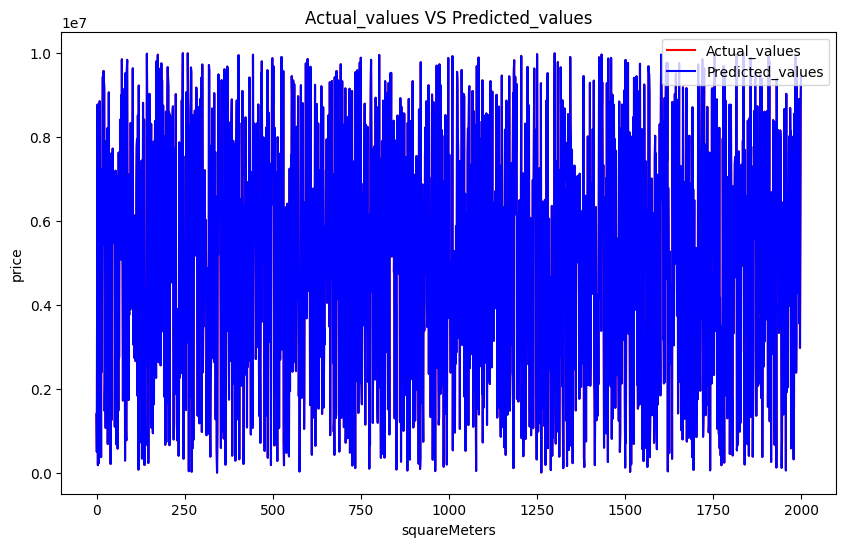

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
plt.figure(figsize=(10,6))
y_test=list(y_test)
X_test=list(X_test)
plt.plot(y_test,color='red',label='Actual_values')
plt.plot(predict,color='blue',label='Predicted_values')
plt.title('Actual_values VS Predicted_values')
plt.xlabel('squareMeters')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# Predict the price of a new apartment with the following features:
# District: 5
# Number of rooms: 5
# Floor: 2
# Surface area: 75000
# Pool:1
# Garage:1
# Attic:1
# Has guest rooms:3
# Basement:3
# Has storm protector:4
# Number of previous owners:2
# Has yard:1
# City part range:20
# Has storage rooms:3
# How many years ago built:5
# City code:10


new_data = [[500, 405, 2478, 75000,14,167,2071,35,673,409,2673,1000,2670,3974,500,17650]]

# Preprocess the new data
new_data = scaler.transform(new_data)

# Make predictions using the Random Forest Regression model
print('Predicted price:', rf.predict(new_data))


Predicted price: [15734.982]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
